# Introduction

We have a dataset for reviews on an applications used for schedule planning and to-dos. As a Data Science Intern, we will perform necessary data pre-processing and analysis to get insisghts on the data. Final goal is to derive certain results on sentiment analysis for the reviews on the applications.

We will start with performing EDA on the data. For that, let's load the data and create our dataframe :

In [1]:
#libraries & packages
import  pandas as pd
import re
from math import ceil
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import mplcursors
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from afinn import Afinn


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# read csv file
reviewData = pd.read_csv("US_project.csv")

# showing data 
reviewData.sample(5)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
5773,ce572395-c55b-406e-b82d-5e7e3c80be52,Miss. Wolfy,https://play-lh.googleusercontent.com/a-/ALV-U...,It is a great app.,0,4.73.0,04-03-2024 06:08,NaN,NaN,4.73.0,newest,cc.forestapp
4857,96089303-7a82-437c-83af-34ef7a00d249,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I cannot log in to my old account since I have...,10,4.11.5,11-12-2019 21:54,"Hi,\nSorry for the inconvenience. Could you pl...",18-01-2020 21:02,4.11.5,most_relevant,cc.forestapp
10663,4205706d-94f1-4716-9587-9c5ca8e8bceb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Got this, loved the free version. paid $3.99 f...",2,5.10.3,16-08-2019 15:05,Hello. \nPlace the widget on the home screen ...,17-08-2019 04:28,5.10.3,most_relevant,prox.lab.calclock
11054,38fbf32f-586a-40a9-9840-76adfde5132b,Nicholas Kent,https://play-lh.googleusercontent.com/a-/ALV-U...,Loving this app and widget! Just purchased pre...,2,5.20.1,09-08-2021 03:01,"Hello. You can. \nGo to application settings, ...",09-08-2021 03:52,5.20.1,most_relevant,prox.lab.calclock
10505,27456b4b-b9d3-44d1-9d64-c08a6cdead04,‫محمدعمران شریف (عیار)‬‎,https://play-lh.googleusercontent.com/a-/ALV-U...,So nice this is very good,0,5.26.2,08-11-2023 08:57,NaN,NaN,5.26.2,newest,prox.lab.calclock


In [3]:
 # Also, let's check rows & columns of the dataframe 
reviewData.shape

(16787, 12)

In [4]:
# Also some basic information of dataset like memory uage and data types of columns 
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


# Data Pre-processing

## Removing Irrelevant Data

As we can see from the sample data of the dataframe, the **userImage** column consisting of URLs has no relevancy to our analysis so it is better to get rid of it and reduce the size of our dataframe to help aid faster processing. Further the columns **reviewCreatedVersion** & **appVersion** have the same values creating redundancy so one of it will be removed as well.

**_Note_**: Keep an eye on the memory usage of data frame. It will be reducing as we clean our data further.

In [5]:
# removing irrevalent data
reviewData.drop(columns=['userImage','reviewCreatedVersion'],axis=1,inplace=True)

reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       16787 non-null  object
 1   userName       16787 non-null  object
 2   content        16786 non-null  object
 3   thumbsUpCount  16787 non-null  int64 
 4   at             16787 non-null  object
 5   replyContent   9168 non-null   object
 6   repliedAt      9168 non-null   object
 7   appVersion     14430 non-null  object
 8   sortOrder      16787 non-null  object
 9   appId          16787 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


## Fixing Datatypes

In [6]:
reviewData.describe()

,thumbsUpCount
count,16787.000000
mean,9.658962
std,32.028656
min,0.000000
25%,0.000000
50%,1.000000
75%,6.000000
max,1951.000000


**_info()_** shows most of the colume have a **object** datatype which is default datatype for non numeric values and one of it is **int64** datatype but using **_describe()_** we see that the maximum value for the integer datatype is _1951_ so **int16** should be enough.

In [7]:
#converting datatype for the int column
reviewData['thumbsUpCount'] = reviewData['thumbsUpCount'].astype('int16')

Further, from all of the other columns, column **_at_** & **_repliedAt_** can be better represented as **datetime** datatype

In [8]:
datetime_colms = ['at','repliedAt']
for c in datetime_colms:
    reviewData[c] = pd.to_datetime(reviewData[c], dayfirst=True)

Moreover, on checking for possible values of **_sortOrder_** & **_appId_** columns, it appears that they have limited set of values available as shown below. So these are perfect examples of **category** datatype.

In [9]:
reviewData['sortOrder'].unique()

array(['most_relevant', 'newest'], dtype=object)

In [10]:
reviewData['appId'].unique()

array(['com.anydo', 'com.todoist', 'com.ticktick.task',
       'com.habitrpg.android.habitica', 'cc.forestapp',
       'com.oristats.habitbull', 'com.levor.liferpgtasks', 'com.habitnow',
       'com.microsoft.todos', 'prox.lab.calclock',
       'com.gmail.jmartindev.timetune', 'com.artfulagenda.app',
       'com.tasks.android', 'com.appgenix.bizcal', 'com.appxy.planner'],
      dtype=object)

In [11]:
# Coverting their datatypes
categorical_colms = {'sortOrder':'category', 'appId':'category'}
reviewData = reviewData.astype(categorical_colms)

Finally, all other columns fit to be a **string** datatype which will enable us to perform string operations if needed in future for any analysis.

In [12]:
string_colms = {'reviewId': 'string',
                'userName': 'string',
               'content' : 'string',
               'replyContent': 'string',
               'appVersion': 'string'}
reviewData = reviewData.astype(string_colms)
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16787 non-null  string        
 1   userName       16787 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16787 non-null  int16         
 4   at             16787 non-null  datetime64[ns]
 5   replyContent   9168 non-null   string        
 6   repliedAt      9168 non-null   datetime64[ns]
 7   appVersion     14430 non-null  string        
 8   sortOrder      16787 non-null  category      
 9   appId          16787 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 984.5 KB


### Question  :
As we see there are many null values, what will be the best way to handle them ?

Let's begin with other pre-processing assigned for the project. 

In [13]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16787 non-null  string        
 1   userName       16787 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16787 non-null  int16         
 4   at             16787 non-null  datetime64[ns]
 5   replyContent   9168 non-null   string        
 6   repliedAt      9168 non-null   datetime64[ns]
 7   appVersion     14430 non-null  string        
 8   sortOrder      16787 non-null  category      
 9   appId          16787 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 984.5 KB


In [14]:
# So there is one row where content is null, let's remove that row entirely

reviewData = reviewData.dropna(subset=['content'])
reviewData.shape


(16786, 10)

In [15]:
# Convert to lower case
reviewData['content'] = reviewData['content'].str.lower()

reviewData.sample(5)


,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId
16175,e47cd5e7-1734-443f-be58-b672f92f360a,A Google user,"the only problem i have come across so far is,...",1,2016-01-13 13:33:00,<NA>,NaT,3.2.2,most_relevant,com.appxy.planner
11984,bd86f128-7ce6-4ae5-99fc-b498ede4cf52,A Google user,notification does not sound. pls develop.........,0,2019-07-04 01:24:00,Hi. We don't fully understand your question ab...,2019-07-04 08:38:00,2.6.4,most_relevant,com.gmail.jmartindev.timetune
3460,fd58de8d-7142-47ac-af0c-3fc15b837a0f,Betsy Moore,"i use this for all my to-do lists, shopping li...",34,2022-03-27 20:53:00,<NA>,NaT,6.2.4.1,most_relevant,com.ticktick.task
3327,455b612e-7338-455b-81cc-596aee73c02d,TofAn BahAri,please add local calendar of different countries.,0,2024-03-11 09:39:00,<NA>,NaT,<NA>,newest,com.ticktick.task
6417,bf44d596-f54c-49fb-97f3-59765d50ab61,A Google user,i bought the paid verison. it does help us tra...,4,2019-06-20 13:50:00,<NA>,NaT,1.5.11,most_relevant,com.oristats.habitbull


In [16]:
# Removing links using regex match
reviewData['content'] = reviewData['content'].apply(lambda x: re.sub(r'http\S+', '', x))
reviewData['content'] = reviewData['content'].astype('string')

In [17]:
# Removing new lines using regex
reviewData['content'] = reviewData['content'].replace('\n', '', regex=True)

In [18]:
# removing alpha-numeric words
reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))
reviewData['content'] = reviewData['content'].astype('string') # as above operation changes it to object

In [19]:
# removing extra spaces from end as well as from in between
reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join(x.strip().split()))
reviewData['content'] = reviewData['content'].astype('string') # as above operation changes it to object

In [20]:
# removing any special characters using regex
reviewData['content'] = reviewData['content'].replace('[^a-zA-Z0-9\s]', '', regex=True)
reviewData['content'] = reviewData['content'].astype('string') # as above operation changes it to object

In [21]:
#removing stop words
stop_words = set(stopwords.words('english'))
reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
reviewData['content'] = reviewData['content'].astype('string') # as above operation changes it to object
advanced_reviewData = reviewData.copy()
reviewData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [22]:
# stemming
# stemmer = PorterStemmer()
# reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# I opted against stemming because I require valid words, linguistic precision, and semantic comprehension in this analysis. Therefore, lemmatization is the better choice.

In [23]:
#lemmatization
lemmatizer = WordNetLemmatizer()
reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
reviewData['content'] = reviewData['content'].astype('string') # as above operation changes it to object

In [24]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [25]:
reviewData.sample(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId
564,8ea29e25-fe0d-4ab7-a8fc-030811eff3e4,A Google user,android homescreen widget keep hanging every i...,92,2018-10-13 13:48:00,You appear to be using an old version of the a...,2018-10-14 13:51:00,4.10.3.4,most_relevant,com.anydo
13666,ff30a8fb-e62a-4682-a853-3ad828e873ee,A Google user,notification expectation need keep reminding u...,0,2019-06-23 10:20:00,"Hi Josena, You should have received a notifica...",2019-06-23 10:18:00,1.28,most_relevant,com.tasks.android
9306,51a46619-83a5-4f2f-8ac7-be9a82df00c6,William Hester,somekind bug selection subtask text making gli...,76,2024-02-29 12:59:00,"Hi William, we are so sorry for the inconvenie...",2022-12-21 05:02:00,2.114.690.02,newest,com.microsoft.todos
6489,b5b70b54-4bba-4474-9a80-d213ccb70e5d,A Google user,hourly reminder dont work properly show someti...,3,2018-09-15 11:39:00,<NA>,NaT,1.5.11,most_relevant,com.oristats.habitbull
846,59bfbd38-6123-40fa-8ac0-702f741a4996,Craig Alner,preferred original home screen dont need anyth...,1,2024-02-08 15:29:00,"If you're enjoying the app, we'd very much app...",2024-02-09 15:42:00,5.17.0.157,most_relevant,com.anydo


### Question : 
It is seen that the size of dataframe is increased from 984kB to 1.1+MB after performingabove techniques. Logically, we have removed a lot of stuffs from content, if any, or even if it is not, the size should have been either the same or reduced. What is the reason for the increment ?

## Text Data Plots

As we already did lemmetization, most of the words which would have a magnitude of emotions demostrated with comparative or superlative degree would have been convertated to positive degree. For eg : better or best to good. So we can perform sentimental analysis plot as Postive, neutral, negative and not very positive, positive, neutral, negative, very negative. 

### Word Cloud
For initial plotting of words, we would visualize frequency of words in text data by comparing relative size based on their count. 

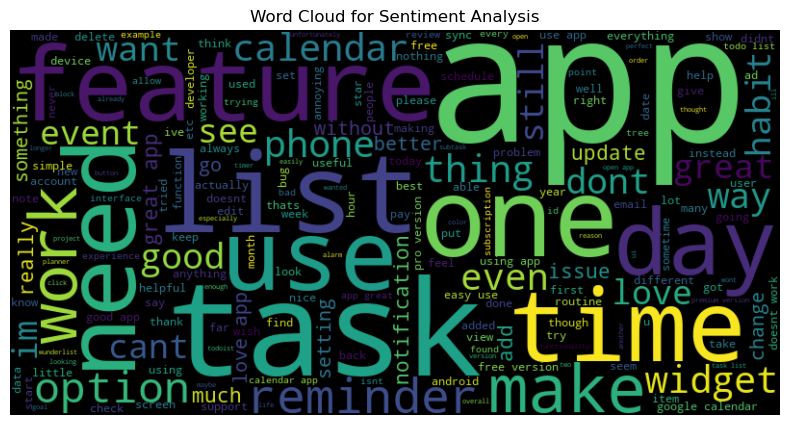

In [26]:
# Concatenate all text data into a single string
text_data = " ".join(reviewData['content'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text_data)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Sentiment Analysis")
plt.show()

### Bar Chart for Word Frequencies
Now that we know, that there are certain words that occur relatively more frequent then other based on the size of the words in the plotting, we should be checking upon exactly how frequent are those by quantization of the frequency count.

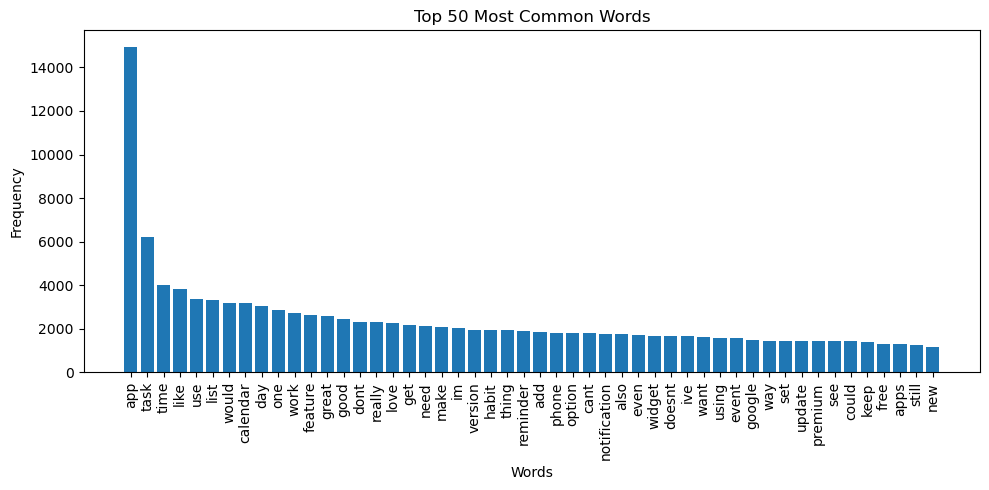

In [27]:
# Split text data into words and count frequencies
words = text_data.split()
word_counts = Counter(words)

# Plot bar chart
common_words = word_counts.most_common(50)  # Top 10 most common words
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words')
plt.xticks(rotation=90)
plt.tight_layout()
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Frequency: {sel.artist.get_height()}"))
plt.show()


### Histograms of Text Lengths
Further, we know that to express sentiments people usually pour out what's on their mind. A lengthy text would mean that the sentiments are very strong whereas a smaller text would imply neutral or lower intensity sentiments. Let's explore the same :

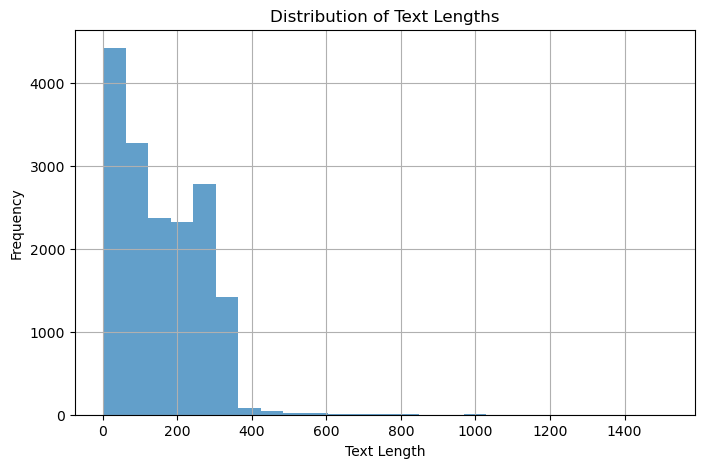

In [28]:
text_lengths = reviewData['content'].dropna().apply(len)
plt.figure(figsize=(8, 5))
plt.hist(text_lengths, bins=25, alpha=0.7)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.grid(True)
plt.show()

In [29]:
# why is this so distributed ? because the maximum length is 1500+. So X-axis is highly dispersed.
max_text_length = reviewData['content'].dropna().apply(len).max()
print("Maximum Text Length:", max_text_length)

Maximum Text Length: 1513


### Sentiment Distribution Pie Chart
Finally, we would like to see the sentiment distriution in 3 major categories viz positive, neutral & negative within the text data that we have. This would give a precise cumulative idea of sentiment being displayed through **content** column. **However, as we have not yet differentiated sentiments of each entry in content column, we will be plotting pie charts after modeling with different approaches.**

## Modeling

### VADER (Valence Aware Dictionary and sEntiment Reasoner):
VADER is a lexicon and rule-based sentiment analysis tool specifically designed for **social media text**. It assigns sentiment scores (positive, negative, or neutral) to **individual words** and calculates an overall sentiment score for a text based on the combination of these word-level scores and syntactic rules.

In [30]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_scores'] = reviewData['content'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
reviewData['compound'] = reviewData['sentiment_scores'].apply(lambda x: x['compound'])
reviewData['positive'] = reviewData['sentiment_scores'].apply(lambda x: x['pos'])
reviewData['negative'] = reviewData['sentiment_scores'].apply(lambda x: x['neg'])
reviewData['neutral'] = reviewData['sentiment_scores'].apply(lambda x: x['neu'])

# Classify sentiment based on compound score
reviewData['sentiment'] = reviewData['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(5)


,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'neg': 0.241, 'neu': 0.662, 'pos': 0.097, 'co...",-0.7783,0.097,0.241,0.662,negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'neg': 0.051, 'neu': 0.889, 'pos': 0.061, 'co...",0.1280,0.061,0.051,0.889,positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'neg': 0.207, 'neu': 0.753, 'pos': 0.04, 'com...",-0.8357,0.040,0.207,0.753,negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'neg': 0.121, 'neu': 0.626, 'pos': 0.252, 'co...",0.7717,0.252,0.121,0.626,positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'neg': 0.214, 'neu': 0.607, 'pos': 0.179, 'co...",-0.2914,0.179,0.214,0.607,negative


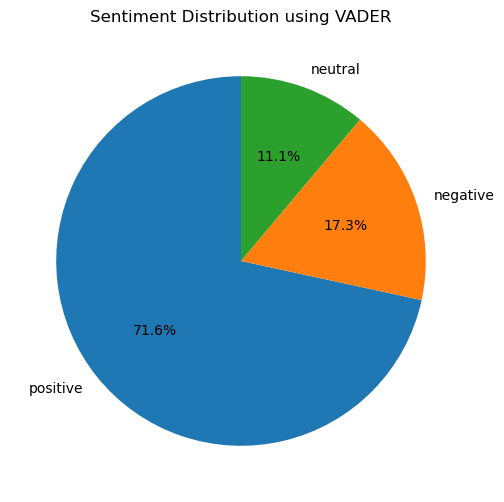

In [31]:
sentiment_counts = reviewData['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using VADER')
plt.show()

### SentiWordNet:
SentiWordNet is a lexical resource that assigns sentiment scores to words based on their synsets (sets of **synonymous words**). Each word's sentiment score in SentiWordNet corresponds to its positivity, negativity, and objectivity.

In [32]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [33]:
# Function to get sentiment scores using SentiWordNet
def get_sentiment_scores(text):
    tokens = word_tokenize(text)
    pos_score = 0
    neg_score = 0
    obj_score = 0
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        synsets = list(swn.senti_synsets(lemma))
        if synsets:
            pos_score += synsets[0].pos_score()
            neg_score += synsets[0].neg_score()
            obj_score += synsets[0].obj_score()
    total_score = pos_score - neg_score
    return {'positive': pos_score, 'negative': neg_score, 'objective': obj_score, 'total': total_score}

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_scores'] = reviewData['content'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
reviewData['positive'] = reviewData['sentiment_scores'].apply(lambda x: x['positive'])
reviewData['negative'] = reviewData['sentiment_scores'].apply(lambda x: x['negative'])
reviewData['objective'] = reviewData['sentiment_scores'].apply(lambda x: x['objective'])
reviewData['total_score'] = reviewData['sentiment_scores'].apply(lambda x: x['total'])

# Classify sentiment based on total score
reviewData['sentiment'] = reviewData['total_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment,objective,total_score
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'positive': 2.75, 'negative': 1.625, 'objecti...",-0.7783,2.75,1.625,0.662,positive,33.625,1.125
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 0.375, 'objectiv...",0.1280,1.50,0.375,0.889,positive,40.125,1.125
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 1.75, 'objective...",-0.8357,1.50,1.750,0.753,negative,34.750,-0.250
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'positive': 4.25, 'negative': 2.375, 'objecti...",0.7717,4.25,2.375,0.626,positive,26.375,1.875
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 2.5, 'objective'...",-0.2914,1.50,2.500,0.607,negative,35.000,-1.000


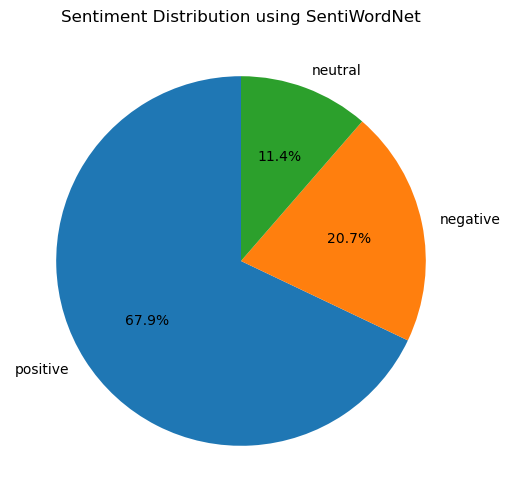

In [34]:
sentiment_counts = reviewData['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using SentiWordNet')
plt.show()

### AFINN (Affective Norms for English Words):
AFINN is a list of **English words manually annotated with sentiment scores ranging from -5 (very negative) to +5 (very positive)**. It's a simple yet effective lexicon-based approach for sentiment analysis.

In [35]:
# Initialize the Afinn sentiment analyzer
afinn = Afinn()

# Function to get sentiment scores using Afinn
def get_sentiment_scores(text):
    return afinn.score(text)

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_score'] = reviewData['content'].apply(get_sentiment_scores)

# Classify sentiment based on sentiment score
reviewData['sentiment'] = reviewData['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment,objective,total_score,sentiment_score
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'positive': 2.75, 'negative': 1.625, 'objecti...",-0.7783,2.75,1.625,0.662,negative,33.625,1.125,-6.0
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 0.375, 'objectiv...",0.1280,1.50,0.375,0.889,positive,40.125,1.125,3.0
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 1.75, 'objective...",-0.8357,1.50,1.750,0.753,negative,34.750,-0.250,-10.0
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'positive': 4.25, 'negative': 2.375, 'objecti...",0.7717,4.25,2.375,0.626,positive,26.375,1.875,4.0
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 2.5, 'objective'...",-0.2914,1.50,2.500,0.607,neutral,35.000,-1.000,0.0


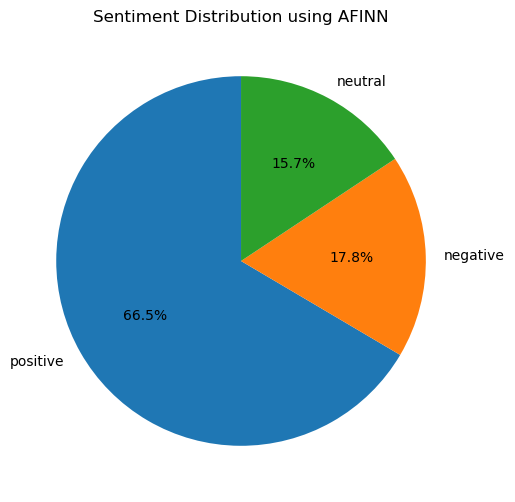

In [36]:
sentiment_counts = reviewData['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using AFINN')
plt.show()

### Rule-Based Lexicon Integration:
In rule-based sentiment analysis systems, lexicons are often integrated into **predefined rules or heuristics**. For example, a rule might state that if a sentence contains more positive words than negative words from a lexicon, classify it as positive sentiment; otherwise, classify it as negative sentiment.

In [37]:
# Define a custom lexicon with sentiment scores for specific words
custom_lexicon = {
    'good': 1,
    'excellent': 1,
    'bad': -1,
    'terrible': -1,
    'great' : 1,
    'love' : 1,
    'like': 1,
    'best': 1,
    'annoying': -1,
    'nice': 1,
    'bug': -1,
    'better': 1,
    'problem': -1,
    'issue': -1,
    'pro': 1,
    'perfect': 1,
    'cant': -1,
    'well': 1,
    'helpful': 1,
    'right': 1,
    'dont': -1,
    'simple': 1
}

# Function to get sentiment scores using the custom lexicon
def get_sentiment_score(text):
    words = text.lower().split()
    sentiment_score = 0
    for word in words:
        if word in custom_lexicon:
            sentiment_score += custom_lexicon[word]
    return sentiment_score

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_score'] = reviewData['content'].apply(get_sentiment_score)

# Classify sentiment based on sentiment score
reviewData['sentiment'] = reviewData['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment,objective,total_score,sentiment_score
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'positive': 2.75, 'negative': 1.625, 'objecti...",-0.7783,2.75,1.625,0.662,negative,33.625,1.125,-1
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 0.375, 'objectiv...",0.1280,1.50,0.375,0.889,neutral,40.125,1.125,0
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 1.75, 'objective...",-0.8357,1.50,1.750,0.753,positive,34.750,-0.250,1
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'positive': 4.25, 'negative': 2.375, 'objecti...",0.7717,4.25,2.375,0.626,neutral,26.375,1.875,0
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 2.5, 'objective'...",-0.2914,1.50,2.500,0.607,positive,35.000,-1.000,1


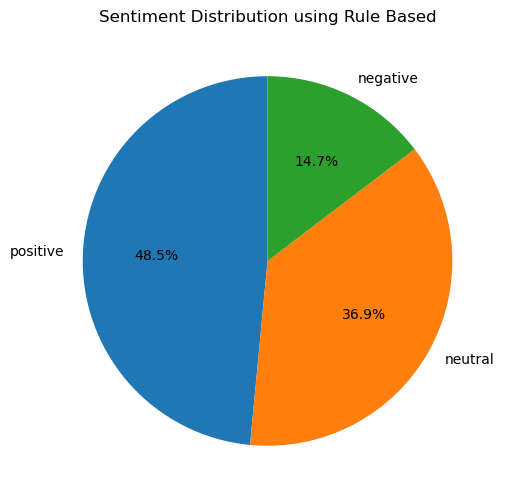

In [38]:
sentiment_counts = reviewData['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using Rule Based')
plt.show()

## Analysis Conclusion
After looking at how **VADER, SentiWordNet, AFINN and the Rule-Based Lexicon** Integration analyzed the data, it's clear that they all saw a **positive vibe** overall. But, there's a noticeable difference in how they saw neutral and negative feelings.

**VADER, SentiWordNet, and AFINN** tended to label **more things as negative than neutral**. This hints that the data has more strong feelings, either positive or negative, and fewer in-between ones.

On the flip side, **the Rule-Based Lexicon Integration** saw **more things as neutral than negative**. This happened because of the specific rules and word scores it used. In this method, how a word is seen depends a lot on the rules and scores set beforehand. If these aren't detailed enough, it can lead to more neutral labels.

Overall, the sentiment across all methods leans towards **positivity**, but there are differences in how they handle the shades of emotions.








## Extra Mile

Our analysis was made on entire text data in **content** column which was reviews provided for different apps with various **appId**. Overall, it was a positive sentiment conveyed. However, it would be more sensible to find sentiments for each of these applications and figure out which one is better than other.

In [39]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   reviewId          16786 non-null  string        
 1   userName          16786 non-null  string        
 2   content           16786 non-null  string        
 3   thumbsUpCount     16786 non-null  int16         
 4   at                16786 non-null  datetime64[ns]
 5   replyContent      9167 non-null   string        
 6   repliedAt         9167 non-null   datetime64[ns]
 7   appVersion        14429 non-null  string        
 8   sortOrder         16786 non-null  category      
 9   appId             16786 non-null  category      
 10  sentiment_scores  16786 non-null  object        
 11  compound          16786 non-null  float64       
 12  positive          16786 non-null  float64       
 13  negative          16786 non-null  float64       
 14  neutral           16786 non

In [40]:
#let's drop additional columns first
additional_columns = ['sentiment_scores', 'compound', 'positive', 'negative', 'neutral', 'sentiment', 'objective', 'total_score','sentiment_score']
reviewData.drop(columns=additional_columns, inplace=True)
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [41]:
#Use VADER to get the analysis again

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_scores'] = reviewData['content'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
reviewData['compound'] = reviewData['sentiment_scores'].apply(lambda x: x['compound'])
reviewData['positive'] = reviewData['sentiment_scores'].apply(lambda x: x['pos'])
reviewData['negative'] = reviewData['sentiment_scores'].apply(lambda x: x['neg'])
reviewData['neutral'] = reviewData['sentiment_scores'].apply(lambda x: x['neu'])

# Classify sentiment based on compound score
reviewData['sentiment'] = reviewData['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'neg': 0.241, 'neu': 0.662, 'pos': 0.097, 'co...",-0.7783,0.097,0.241,0.662,negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'neg': 0.051, 'neu': 0.889, 'pos': 0.061, 'co...",0.1280,0.061,0.051,0.889,positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'neg': 0.207, 'neu': 0.753, 'pos': 0.04, 'com...",-0.8357,0.040,0.207,0.753,negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'neg': 0.121, 'neu': 0.626, 'pos': 0.252, 'co...",0.7717,0.252,0.121,0.626,positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'neg': 0.214, 'neu': 0.607, 'pos': 0.179, 'co...",-0.2914,0.179,0.214,0.607,negative


In [42]:
# Get all the individual products
unique_apps = list(reviewData['appId'].unique())

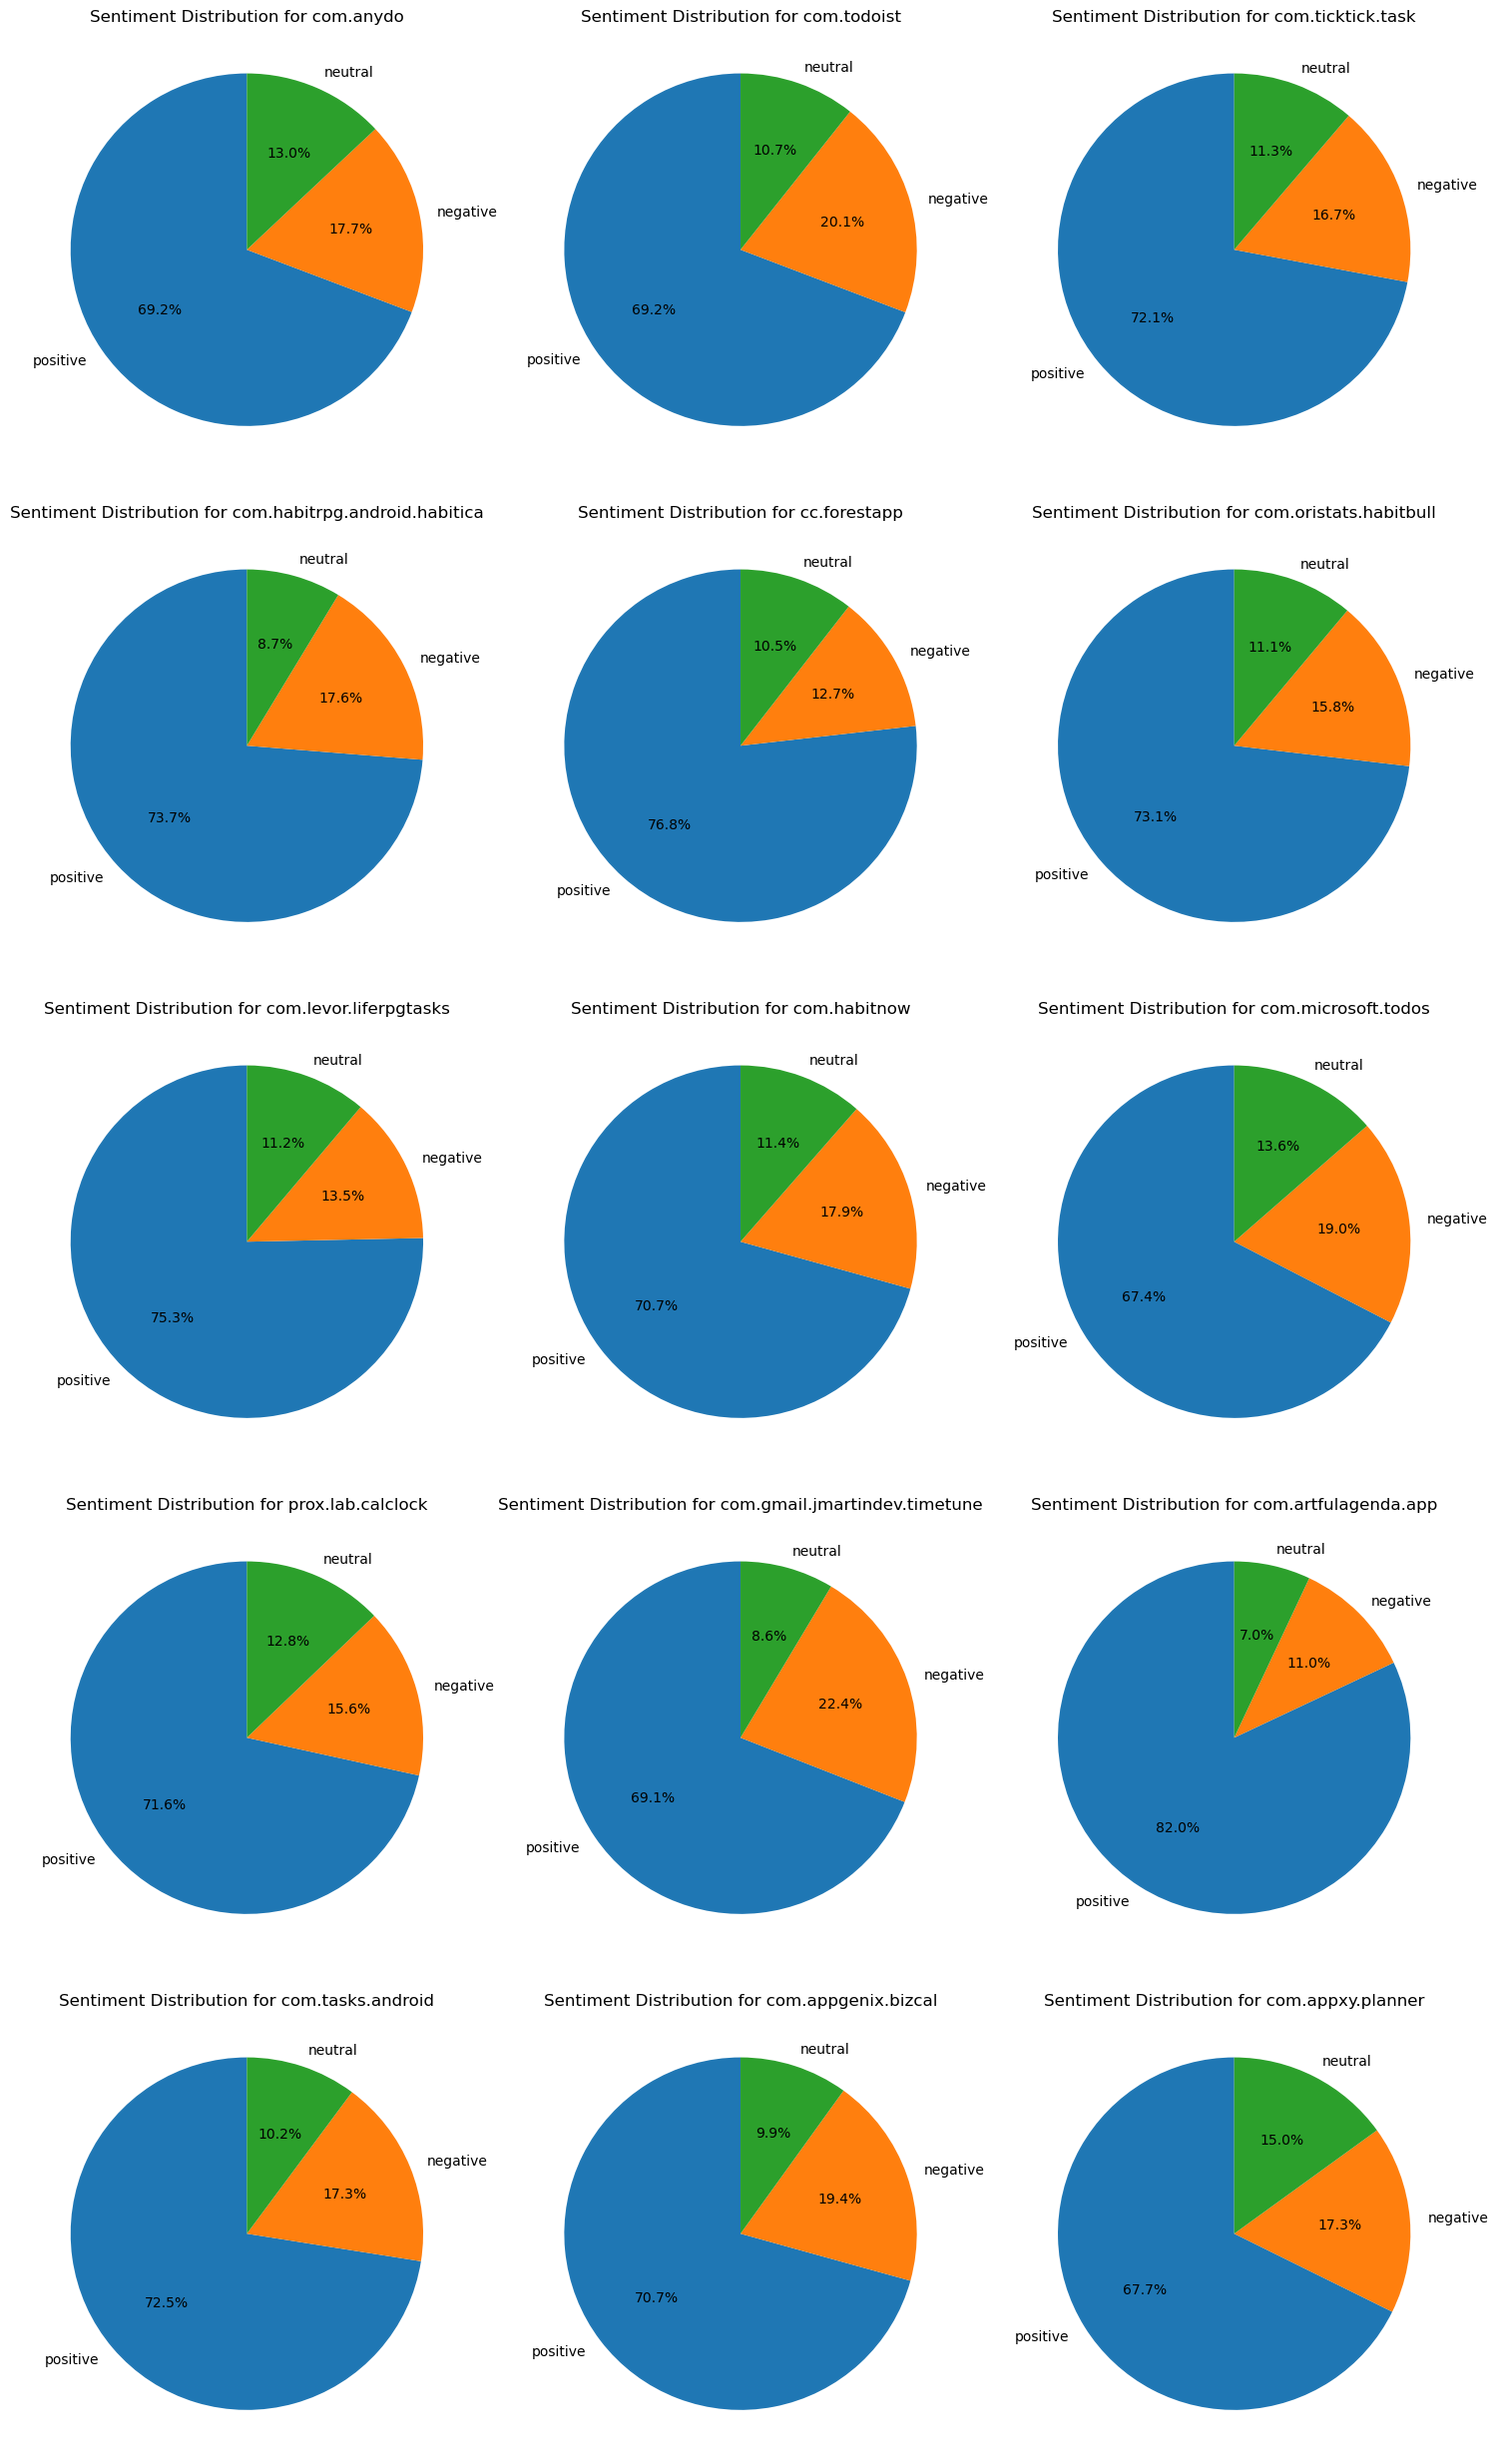

In [43]:
num_apps = len(unique_apps)
num_cols = 3  # Number of columns in the grid layout
num_rows = ceil(num_apps / num_cols)  # Calculate the number of rows based on the number of apps

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Loop through each unique app and create a pie chart
for idx, app in enumerate(unique_apps):
    app_data = reviewData[reviewData['appId'] == app]  # Subset of data for the current app
    app_sentiment_counts = app_data['sentiment'].value_counts()

    axes[idx].pie(app_sentiment_counts, labels=app_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axes[idx].set_title(f'Sentiment Distribution for {app}')

# Hide empty subplots if there are fewer apps than the number of grid cells
for i in range(num_apps, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

So, nothing to my surprise, all of these applications have a **positive sentiment** ranging from **65% to 75%**. So our conclusion was very much true not only for collectively all the application but even for individual ones. 

## Optimization

Above analysis was based on the project expectation from the mentor. Hereafter, I will be trying to be logically extracting more analysis on the data provided to get further ahead on the precision and accuracy of analysis. 

Firstly, let's get the loaded and pre-processed data. Now, the content column has alot of text data but sentiments are best depicted through adjectives (and a few verbs) from the data. We will go ahead and extract the same from the reviews for each of them.

In [44]:
advanced_reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [45]:
import spacy
import en_core_web_sm

# Function to extract adjectives and verbs
def extract_adj_vrb(text):
    if pd.isna(text):  # Check for NaN values
        return None 
    doc = nlp(text)
    adj_verb = ' '.join([token.text for token in doc if (token.pos_,token.dep_) in [('ADJ','advmod'), ('ADJ','amod'), 
                                                                           ('VERB','compound'), ('VERB','ROOT')]])
    return adj_verb if adj_verb else None

# Function to extract other lesser imp words
def extract_others(text):
    if pd.isna(text):  # Check for NaN values
        return None  
    doc = nlp(text)
    other_words = ' '.join([token.text for token in doc if (token.pos_, token.dep_) in [('NOUN','amod'),('NOUN','compound'),
                                                                            ('NOUN','nsubj'),('NOUN','ROOT'),
                                                                            ('PROPN','compound'),('INTJ','intj')]])
    return other_words if other_words else None

# Initialize spaCy NLP pipeline
nlp = en_core_web_sm.load()

# Apply the function to 'content' and 'replyContent' columns
advanced_reviewData['adj_vrb'] = advanced_reviewData['content'].apply(extract_adj_vrb) + ' ' + advanced_reviewData['replyContent'].apply(extract_adj_vrb)
advanced_reviewData['otherWords'] = advanced_reviewData['content'].apply(extract_others) + ' ' + advanced_reviewData['replyContent'].apply(extract_others)


# Replace empty lists with NaN
advanced_reviewData['adj_vrb'] = advanced_reviewData['adj_vrb'].apply(lambda x: x if x else pd.NA)
advanced_reviewData['otherWords'] = advanced_reviewData['otherWords'].apply(lambda x: x if x else pd.NA)

advanced_reviewData.sample(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,adj_vrb,otherWords
14495,4c145cb5-01e8-4544-94b2-84afd51f9893,Tom James,latest beta version wont let modify entries fr...,2,2024-03-27 07:42:00,We've already released another update with the...,2024-03-27 19:46:00,2.49.0,newest,com.appgenix.bizcal,latest let released consider official intended,version entries Please Please update
11471,25916bd8-435d-4e9c-89e5-d823c6ed6a11,A Google user,user friendly atleast alarm doesnt ring vibrat...,46,2019-04-26 05:36:00,Hi Sandip. Sorry you're experiencing problems....,2019-04-26 07:39:00,2.6.1,most_relevant,com.gmail.jmartindev.timetune,friendly atleast ring clear experiencing help ...,alarm vibrates clock dis format Sorry problem ...
10070,a541c12b-bf38-4b45-9157-880693a02399,A Google user,popular todo applications doist ticktick etc o...,0,2019-11-20 14:50:00,<NA>,NaT,2.4.136,most_relevant,com.microsoft.todos,NaN,NaN
11268,f5218553-82c1-4ce5-9a08-7bf1b1638ee8,A Google user,app fantastic work home anyway disruption due ...,37,2020-03-31 14:01:00,😸👍,2020-03-31 14:06:00,5.14.1,most_relevant,prox.lab.calclock,NaN,NaN
13100,d416120c-cb1c-44cc-8723-68cac5d3f398,Mary Beach,love functionality beauty app,0,2024-03-10 13:18:00,Thank you for your five star review Mary! We a...,2024-03-16 21:20:00,1.16.0,newest,com.artfulagenda.app,NaN,love functionality beauty app star fun planning


In [46]:
string_colms = {'adj_vrb': 'string',
                'otherWords': 'string'}
advanced_reviewData = advanced_reviewData.astype(string_colms)
advanced_reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
 10  adj_vrb        8516 non-null   string        
 11  otherWords     7691 non-null   string        
dtypes: category(2), datetime64[ns](2), int16(1), string(7)
memory usage: 1.3 MB


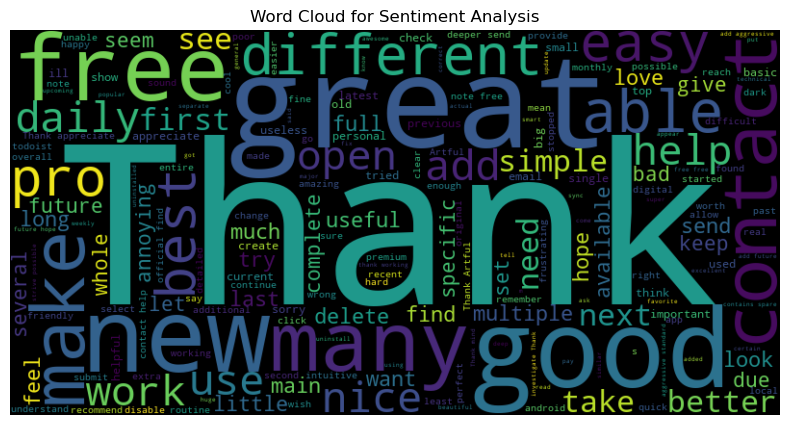

In [47]:
# Word cloud for relavant words

# Filter out non-string items and convert remaining items to strings
filtered_words = [str(word) for word in advanced_reviewData['adj_vrb'].dropna()]

# Join the filtered words using a space as the separator
defining_data = " ".join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(defining_data)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Sentiment Analysis")
plt.show()

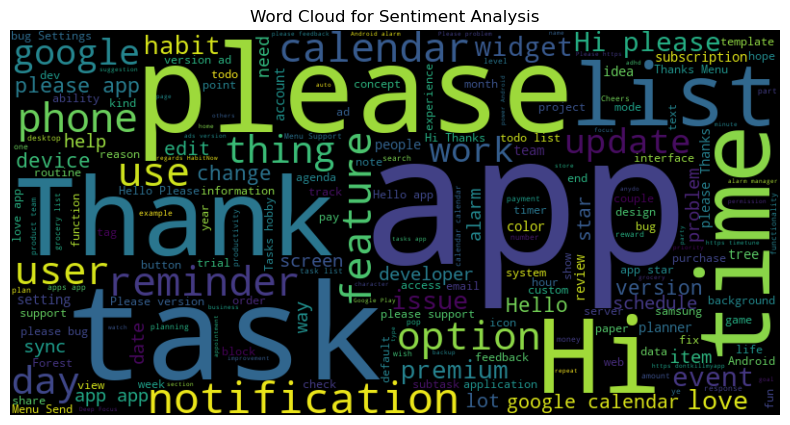

In [48]:
# Word cloud for relavant words

# Filter out non-string items and convert remaining items to strings
filtered_words = [str(word) for word in advanced_reviewData['otherWords'].dropna()]

# Join the filtered words using a space as the separator
rest_data = " ".join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(rest_data)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Sentiment Analysis")
plt.show()

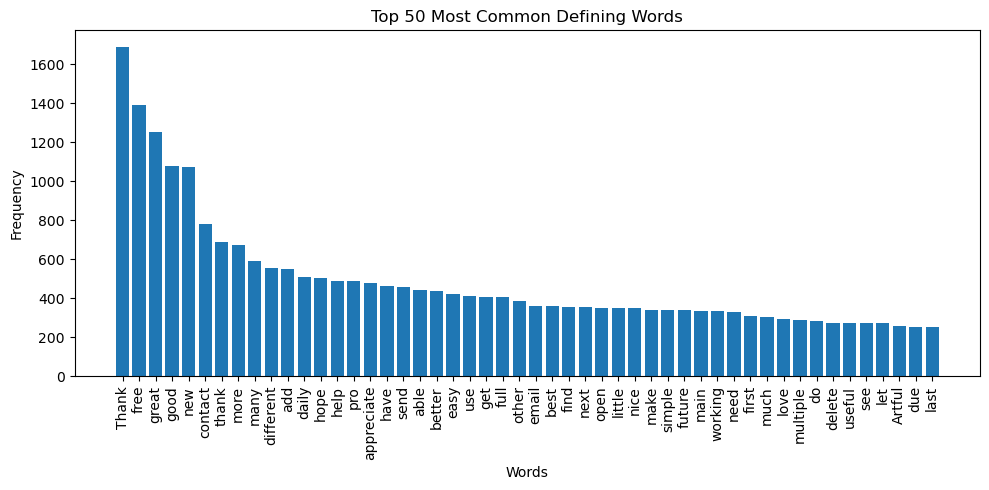

In [49]:
# top words based on count frequency

# Split text data into words and count frequencies
words = defining_data.split()
word_counts = Counter(words)

# Plot bar chart
common_words = word_counts.most_common(50)  # Top 10 most common words
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Defining Words')
plt.xticks(rotation=90)
plt.tight_layout()
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Frequency: {sel.artist.get_height()}"))
plt.show()

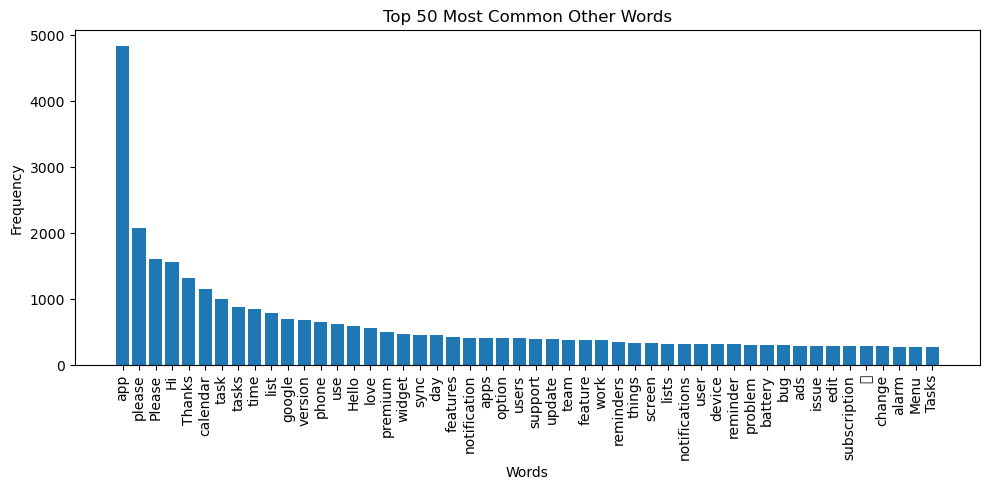

In [50]:
# top words based on count frequency

# Split text data into words and count frequencies
words = rest_data.split()
word_counts = Counter(words)

# Plot bar chart
common_words = word_counts.most_common(50)  # Top 10 most common words
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Other Words')
plt.xticks(rotation=90)
plt.tight_layout()
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Frequency: {sel.artist.get_height()}"))
plt.show()

In [51]:
# Performing VADER on the new columns

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_scores(text):
    if pd.isna(text):  # Check for NaN values
        return {'neg': 10.0, 'neu': 10.0, 'pos': 10.0, 'compound': 10.0}  # Return something if text is NaN
    scores = sid.polarity_scores(text)
    return scores

# Apply the sentiment analysis function to the 'content' column
advanced_reviewData['sentiment_scores'] = advanced_reviewData['adj_vrb'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
advanced_reviewData['compound'] = advanced_reviewData['sentiment_scores'].apply(lambda x: x['compound'])
advanced_reviewData['positive'] = advanced_reviewData['sentiment_scores'].apply(lambda x: x['pos'])
advanced_reviewData['negative'] = advanced_reviewData['sentiment_scores'].apply(lambda x: x['neg'])
advanced_reviewData['neutral'] = advanced_reviewData['sentiment_scores'].apply(lambda x: x['neu'])

# Classify sentiment based on compound score
advanced_reviewData['sentiment'] = advanced_reviewData['compound'].apply(lambda x: 'nothing' if x == 10.0 else ('positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')))

advanced_reviewData.drop(columns=['compound','positive','negative','neutral','sentiment_scores'],axis=1,inplace=True)

# Display the updated DataFrame with sentiment analysis results
advanced_reviewData.head(5)


,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,adj_vrb,otherWords,sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring tasks every day need todolist remind...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,need todolist app different next annoying bett...,tasks buzz time problem reminder times fail sc...,positive
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,spent work get,days couple minutes day week day schedule noti...,neutral
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct emails everyth...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,blue asks last frustrating spend new spend sou...,app update acct task list time list list app P...,negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,terrible used perfect certain easy many planne...,update app tasks interface date app use app Pl...,positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,terrible nice nice turn annoying disable disab...,design features home screen user experience tu...,negative


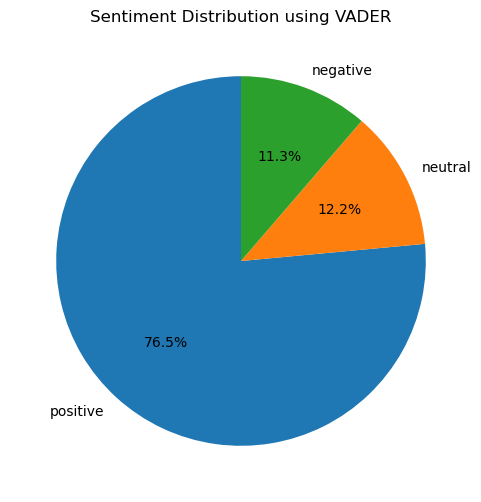

In [52]:
sentiment_counts = advanced_reviewData['sentiment'].value_counts()
sentiment_counts = sentiment_counts.drop("nothing")
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using VADER')
plt.show()

In [53]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_scores(text):
    if pd.isna(text):  # Check for NaN values
        return {'neg': 10.0, 'neu': 10.0, 'pos': 10.0, 'compound': 10.0}  # Return something if text is NaN
    scores = sid.polarity_scores(text)
    return scores

# Apply the sentiment analysis function to the 'content' column
advanced_reviewData['sentiment_scores'] = advanced_reviewData['otherWords'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
advanced_reviewData['compound'] = advanced_reviewData['sentiment_scores'].apply(lambda x: x['compound'])
advanced_reviewData['positive'] = advanced_reviewData['sentiment_scores'].apply(lambda x: x['pos'])
advanced_reviewData['negative'] = advanced_reviewData['sentiment_scores'].apply(lambda x: x['neg'])
advanced_reviewData['neutral'] = advanced_reviewData['sentiment_scores'].apply(lambda x: x['neu'])

# Classify sentiment based on compound score
advanced_reviewData['sentiment_other'] = advanced_reviewData['compound'].apply(lambda x: 'nothing' if x == 10.0 else ('positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')))

advanced_reviewData.drop(columns=['compound','positive','negative','neutral','sentiment_scores'],axis=1,inplace=True)

# Display the updated DataFrame with sentiment analysis results
advanced_reviewData.head(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,adj_vrb,otherWords,sentiment,sentiment_other
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring tasks every day need todolist remind...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,need todolist app different next annoying bett...,tasks buzz time problem reminder times fail sc...,positive,negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,spent work get,days couple minutes day week day schedule noti...,neutral,positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct emails everyth...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,blue asks last frustrating spend new spend sou...,app update acct task list time list list app P...,negative,positive
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,terrible used perfect certain easy many planne...,update app tasks interface date app use app Pl...,positive,positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,terrible nice nice turn annoying disable disab...,design features home screen user experience tu...,negative,positive


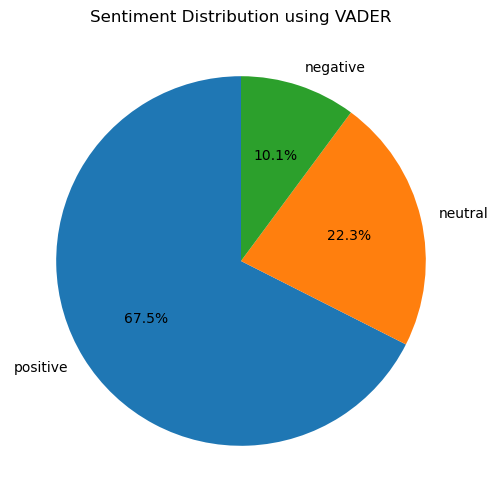

In [55]:
sentiment_counts = advanced_reviewData['sentiment_other'].value_counts()
sentiment_counts = sentiment_counts.drop("nothing")
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using VADER')
plt.show()

[63162, 8570, 4771]


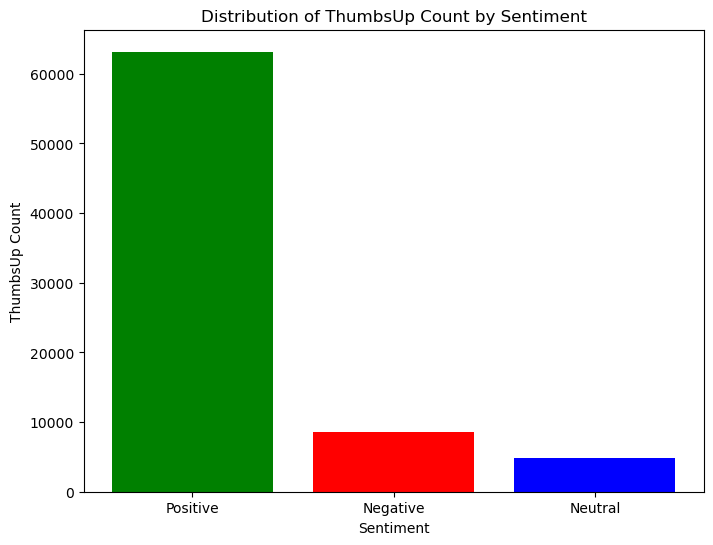

In [56]:
# Filter the DataFrame for each sentiment category
positive_sentiment = advanced_reviewData[advanced_reviewData['sentiment'] == 'positive']
negative_sentiment = advanced_reviewData[advanced_reviewData['sentiment'] == 'negative']
neutral_sentiment = advanced_reviewData[advanced_reviewData['sentiment'] == 'neutral']

# Calculate thumbsUp count for each sentiment category
thumbsup_positive = positive_sentiment['thumbsUpCount'].sum()
thumbsup_negative = negative_sentiment['thumbsUpCount'].sum()
thumbsup_neutral = neutral_sentiment['thumbsUpCount'].sum()

# Create a bar plot
sentiments = ['Positive', 'Negative', 'Neutral']
thumbsup_counts = [thumbsup_positive, thumbsup_negative, thumbsup_neutral]
print(thumbsup_counts)

plt.figure(figsize=(8, 6))
plt.bar(sentiments, thumbsup_counts, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('ThumbsUp Count')
plt.title('Distribution of ThumbsUp Count by Sentiment')
plt.show()

[51003, 8350, 13396]


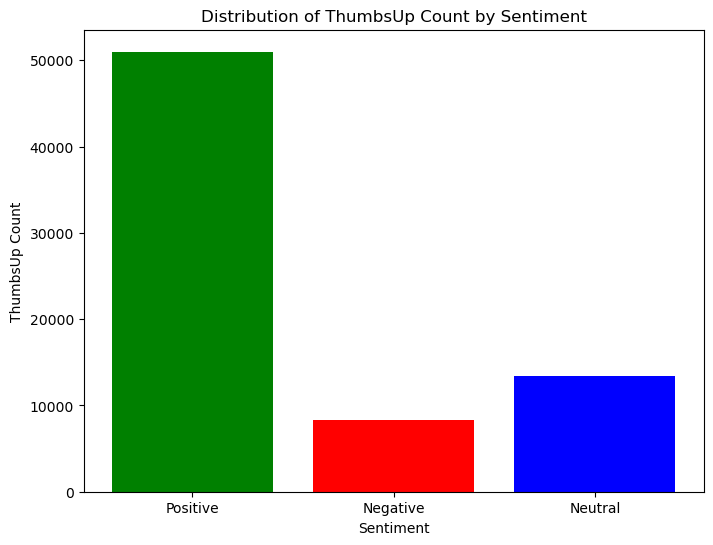

In [57]:
# Filter the DataFrame for each sentiment category
positive_sentiment = advanced_reviewData[advanced_reviewData['sentiment_other'] == 'positive']
negative_sentiment = advanced_reviewData[advanced_reviewData['sentiment_other'] == 'negative']
neutral_sentiment = advanced_reviewData[advanced_reviewData['sentiment_other'] == 'neutral']

# Calculate thumbsUpCount for each sentiment category
thumbsup_positive = positive_sentiment['thumbsUpCount'].sum()
thumbsup_negative = negative_sentiment['thumbsUpCount'].sum()
thumbsup_neutral = neutral_sentiment['thumbsUpCount'].sum()

# Create a bar plot
sentiments = ['Positive', 'Negative', 'Neutral']
thumbsup_counts = [thumbsup_positive, thumbsup_negative, thumbsup_neutral]
print(thumbsup_counts)

plt.figure(figsize=(8, 6))
plt.bar(sentiments, thumbsup_counts, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('ThumbsUp Count')
plt.title('Distribution of ThumbsUp Count by Sentiment')
plt.show()

### Conclusion
I did the analysis by performing below improvements:
- Instead of taking just _content_ column, _replyContent_ column is also considered.
- Instead of taking entire text from _content_ column, I used only the necessary words **(adjectives, nouns, verbs, etc)** from both _content_ & _replyContent_ fields.
- After tagging of sentiments, its distribution is been analysed through the _thumbsUp_ column.

The results are matchig point to point to the analysis previously obtained solidifying the analysis that overall it is a **positive** sentiment emitted through the data followed by **neutral** and **negative** sentiments. But we now know another insight. Look at the values of sentiments below : 

|    Analysis   | Positive | Neutral | Negative |
|---------------|----------|---------|----------|
|Initial Overall|  71.6%   |  17.3%  |  11.1%   |
|---------------|----------|---------|----------|
|Valued Words   |  76.5%   |  12.2%  |  11.3%   |
|---------------|----------|---------|----------|
|Other Words    |  67.5%   |  22.3%  |  10.1%   |


If you add up to the values of the bottom two & take an average, it will be same to the first column which represents that our analysis is correctly on track even with the splitting of entire text into relavant and irrelevant words and also considering the _replyContent_ column in addition to the _content_ column. 

The relevant words actually prove it that the sentiments are much more positive than it is seen in our initial analysis and it has been weighed down by other words as we clearly see their reduced values which then averages into the one we saw in initial analysis. 

At last, the distribution of thumbs-up count over the sentiments shows that people who have not directly placed review have highly demonstrated positive sentiment by upvoting positive sentiment reviews. 